crease: 53

crescent_gap: 226

inclusion: 492

oil_spot: 204

punching_hole: 219

rolled_in_scale: 276

scratches: 300

silk_spot: 651

waist_folding: 150

water_spot: 289

welding_line: 273

In [1]:
import tensorflow as tf
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import np_utils
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import os

In [2]:
X = []
y = []
X_train = []
y_train = []
X_test = []
y_test = []
w = 224
l = 224

In [3]:

cd "C:\Users\Toqa Alaa\PBL2\gc10detold"

C:\Users\Toqa Alaa\PBL2\gc10detold


In [4]:
classes= []
for directory in os.listdir(os.getcwd()): 
    classes.append(directory)
img_array= []

In [5]:
for i in range(len(classes)):
    path= f"{classes[i]}"
    for img in os.listdir(path):
        img= cv2.imread(os.path.join(path,img))
        img_array.append(cv2.resize(img, (100, 100)))
        break

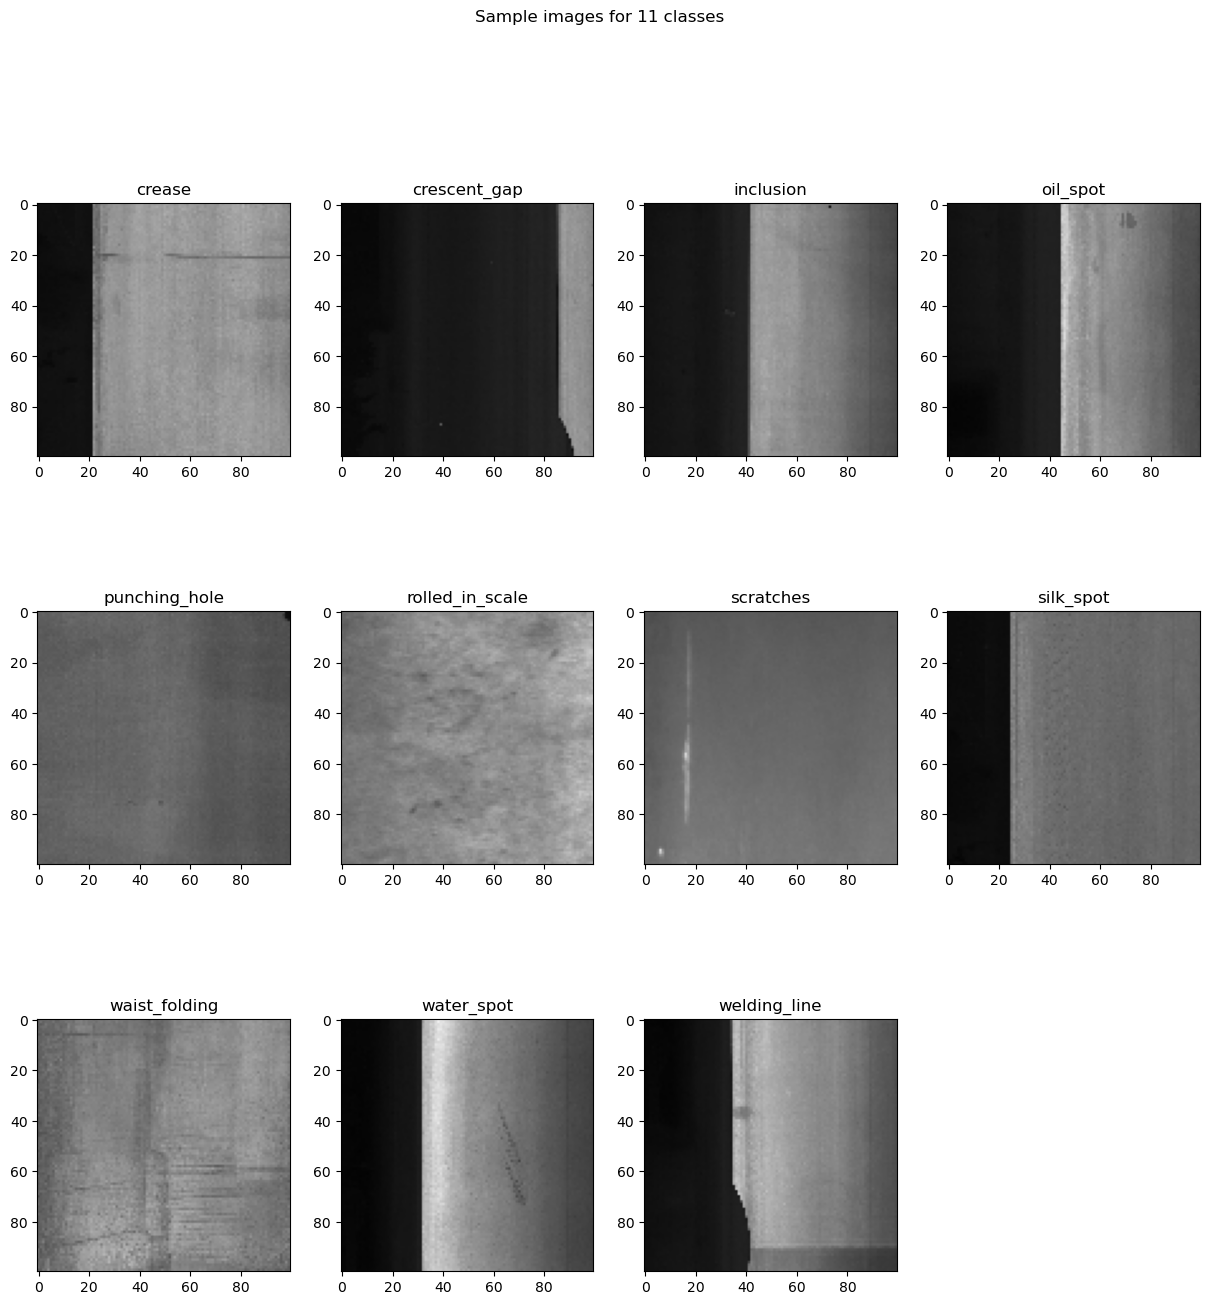

In [6]:
fig = plt.figure(figsize=(15, 15))
spec = gridspec.GridSpec(ncols=3, nrows=4,
                         width_ratios=[1, 1, 1], wspace=0.4,
                         hspace=0.4, height_ratios=[1, 1, 1, 1])
fig.suptitle("Sample images for 11 classes")
for i in range(len(classes)):
    ax= fig.add_subplot(3, 4, i+1)
    ax.imshow(img_array[i], cmap='gray')
    ax.set_title(classes[i])

In [7]:
data_dir = os.getcwd()
class_names = sorted([subdir for subdir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, subdir))])
num_classes = len(class_names)
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)


In [8]:
train_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='training')

Found 2549 images belonging to 11 classes.


In [9]:
val_data_gen = data_gen.flow_from_directory(directory=data_dir,
                                              target_size=(224, 224),
                                              class_mode='categorical',
                                              shuffle=True,
                                              seed=123,
                                              subset='validation')

Found 632 images belonging to 11 classes.


In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [11]:
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')

In [12]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [13]:
from keras import Model
from tensorflow.keras.optimizers import SGD

model = Sequential([pre_trained_model])

model.add(tf.keras.layers.GlobalAveragePooling2D())

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(11, activation='softmax'))

model.compile(optimizer = SGD(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
H = model.fit(
    train_data_gen,
    validation_data = val_data_gen,
    epochs = 30,
    batch_size = 10)

Epoch 1/30


In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 30), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
for i in range(1, 54):
    img = cv2.imread(fr'crease/crease ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(0)

for i in range(1, 227):
    img = cv2.imread(fr'crescent_gap/crescent_gap ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(1)
    
for i in range(1, 493):
    img = cv2.imread(fr'inclusion/inclusion ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(2)

for i in range(1, 205):
    img = cv2.imread(fr'oil_spot/oil_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(3)

for i in range(1, 220):
    img = cv2.imread(fr'punching_hole/punching_hole ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(4)

for i in range(1, 277):
    img = cv2.imread(fr'rolled_in_scale/rolled_in_scale ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(5)
    
for i in range(1, 277):
    img = cv2.imread(fr'scratches/scratches ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(6)
    
for i in range(1, 652):
    img = cv2.imread(fr'silk_spot/silk_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(7)

for i in range(1, 150):
    img = cv2.imread(fr'waist_folding/waist_folding ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(8)
    
for i in range(1, 290):
    img = cv2.imread(fr'water_spot/water_spot ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(9)

for i in range(1, 274):
    img = cv2.imread(fr'welding_line/welding_line ({i}).jpg')
    img = cv2.resize(img, (l, w))
    X.append(img)
    y.append(10)

In [19]:
DataSet_length= len(X)
incorrect_predictions= 0
predictions = []

for i in range(DataSet_length):
    random_image= X[i]
    real_val= y[i]
    random_img= X[i]
    random_img=[random_img]
    random_img = np.array(random_img, dtype = 'float')
    random_img/=255
    prediction = model.predict(random_img)
    yhat = np.argmax(prediction)
    predictions.append(yhat)
    if yhat!= real_val:
        incorrect_predictions+=1
        
print(incorrect_predictions)
print(DataSet_length)
tf.math.confusion_matrix(y, predictions)